In [501]:
import cv2
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt
import os

In [503]:
img= cv2.imread('MangoMass/images/2a.jpg')
gray=np.invert(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))


In [504]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

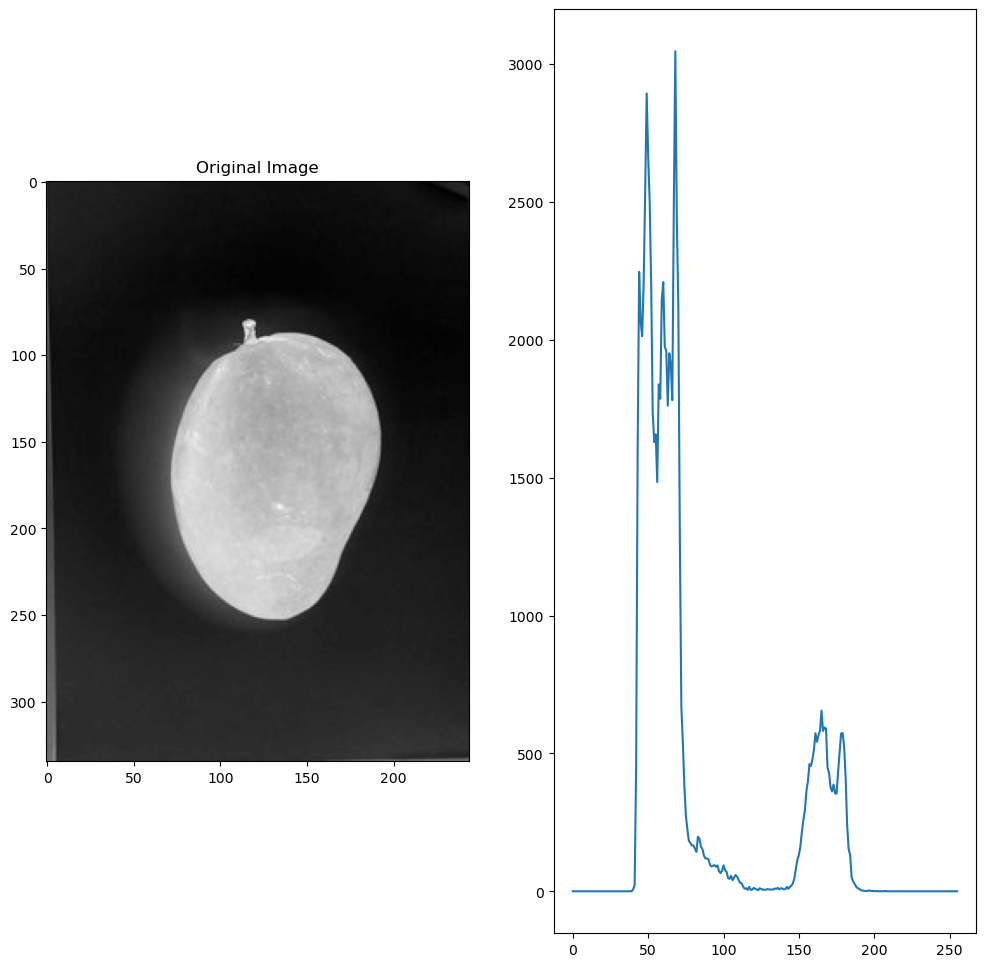

In [505]:
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.plot(hist)

In [506]:
ret,th = cv2.threshold(gray,120,255,cv2.THRESH_BINARY)

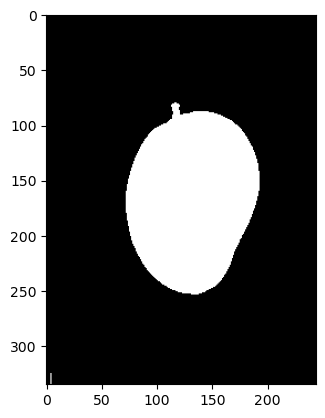

In [507]:
plt.imshow(th,"gray")


In [508]:
kernel = np.ones((3, 3),)
fnal= cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel, iterations=2)


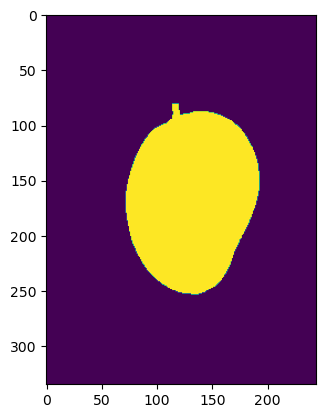

In [509]:
plt.imshow(fnal)

In [510]:
_,binary= cv2.threshold(fnal,1,255,
                        cv2.THRESH_BINARY)

contours,_=cv2.findContours(fnal,
                            cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    perimeter = cv2.arcLength(contour,True)
    print("Perimeter: ", perimeter)

Perimeter:  497.102592587471


In [511]:
cnt=contours[0]

In [512]:
im2=cv2.drawContours(img, cnt, -1, (0,255,0), 3)

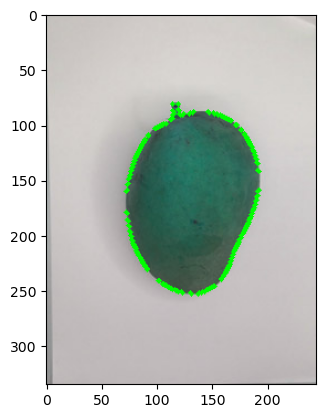

In [514]:
plt.imshow(im2)

In [515]:
area=cv2.contourArea(cnt)



In [516]:
imgpath='MangoMass/images/'
df= pd.read_csv("MangoMass/Harumanis_mango_weight.csv")


In [517]:
df

,no,weight
0,1a.jpg,0.50
1,2a.jpg,0.50
2,3a.jpg,0.35
3,4a.jpg,0.45
4,5a.jpg,0.50
...,...,...
541,270b.jpg,0.45
542,271b.jpg,0.45
543,272b.jpg,0.50
544,273b.jpg,0.45


In [518]:
df["perimeter"]=0
df["area"]=0

In [519]:
imgNames=df['no']

for imgName in imgNames:
    file=os.path.join(imgpath, imgName)
    img= cv2.imread(file)
    gray=np.invert(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    ret,th = cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
    kernel = np.ones((3, 3),)
    fnal= cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel, iterations=2)
    _,binary= cv2.threshold(fnal,1,255,
                        cv2.THRESH_BINARY)

    contours,_=cv2.findContours(fnal,
                                cv2.RETR_EXTERNAL,
                                cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        perimeter = cv2.arcLength(contour,True)

    cnt=contours[0]
    area=cv2.contourArea(cnt)
    df.loc[df['no'] == imgName, 'area'] = area
    df.loc[df['no'] == imgName, 'perimeter'] = perimeter

    
    

C:\Users\JuanC\AppData\Local\Temp\ipykernel_14468\158158195.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '496.6173120737076' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['no'] == imgName, 'perimeter'] = perimeter
C:\Users\JuanC\AppData\Local\Temp\ipykernel_14468\158158195.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11697.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['no'] == imgName, 'area'] = area


In [520]:
df

,no,weight,perimeter,area
0,1a.jpg,0.50,496.617312,15484.0
1,2a.jpg,0.50,497.102593,15116.0
2,3a.jpg,0.35,179.414214,12439.0
3,4a.jpg,0.45,453.445738,13413.0
4,5a.jpg,0.50,501.102593,15526.0
...,...,...,...,...
541,270b.jpg,0.45,478.960458,14328.0
542,271b.jpg,0.45,464.960458,14512.0
543,272b.jpg,0.50,514.658943,16220.5
544,273b.jpg,0.45,471.203098,14214.5


In [521]:
X=df.drop(columns=["weight","no"])

In [522]:
y=df["weight"]

In [529]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [524]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1997)

In [525]:
model= LinearRegression().fit(X_train,y_train)

In [527]:
pred=model.predict(X_test)

In [531]:
mae=mean_absolute_error(y_test,pred)
print("MAE: ",mae)

MAE:  0.0684963791933538


In [539]:
model.predict(X.iloc[[50], :])

array([0.50256198])

0.5